## **Import Libraries**

**Import the required Libraries**

In [ ]:
#Pandas and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Feature reduction models
from sklearn.linear_model import Lasso
from sklearn.manifold import TSNE
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet

#Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

## **Pre-Processing**

**Download and read the sequence File**

In [ ]:
abundance = pd.read_csv('GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv')
abundance.head()

,OTU,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,...,B52,B54,B55,B56,B57,B58,B59,B6,B60,B61
0,OTU1,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,OTU2,d__Bacteria;_k__norank;_p__Proteobacteria;_c__...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTU3,d__Bacteria;_k__norank;_p__Firmicutes;_c__Erys...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,OTU4,d__Bacteria;_k__norank;_p__Firmicutes;_c__Baci...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,OTU5,d__Bacteria;_k__norank;_p__Tenericutes;_c__Mol...,0,0,1,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0


**Transpose the data so that OTU is the feature**

In [ ]:
taxa = abundance[['OTU', 'taxonomy']].set_index('OTU')
abundance_taxa = abundance.drop('taxonomy', axis=1).set_index('OTU').transpose()

abundance_taxa.head()

OTU,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU1329,OTU1330,OTU1331,OTU1332,OTU1333,OTU1334,OTU1335,OTU1336,OTU1337,OTU1338
A1,0,0,0,0,0,1,0,0,50,0,...,1,0,1,0,0,0,0,0,0,0
A10,0,0,0,0,0,0,0,0,10,2,...,5,0,0,0,0,0,0,0,0,0
A100,0,0,0,0,1,0,0,485,13,0,...,0,0,0,0,0,0,0,0,0,0
A101,0,0,0,0,0,0,1,142,17,0,...,0,1,0,0,0,0,0,0,0,0
A102,0,0,0,0,0,0,0,1,9,0,...,1,0,0,0,0,0,0,0,0,0


**Annotate the label - ASD: 1, Healthy Controls:0**

In [ ]:
abundance_list = abundance_taxa.index.to_list()
y = np.array([1 if label.startswith('A') else 0 for label in abundance_list ])

total_species = abundance_taxa.sum(axis = 1)
abs_abundance = bacteria_abundance
x = abundance_taxa / abs_abundance 


## **Dimensionality Reduction**

**Elastic Net Regression: Feature Selection by regularization**

In [ ]:
sel_ = SelectFromModel(ElasticNet(alpha=0.003,l1_ratio=0.1,max_iter=23))
sel_.fit(x, y)
x_elastic = x[x.columns[(sel_.get_support())]]

**Lasso Regression: Feature Selection by regularization**

In [ ]:
sel_ = SelectFromModel(Lasso(alpha=0.00357517,max_iter=20))
sel_.fit(x, y)
x_lasso = x[x.columns[(sel_.get_support())]]

**Principal Component Analysis: Feature Extraction**

In [ ]:
pca = PCA(n_components=8)
pca.fit(x)
x_pca = pca.fit_transform(x)

**t-Distributed Stochastic Neighbor Embedding (t-SNE): Feature Extraction**

In [ ]:
tsne = TSNE(metric = 'jaccard', perplexity=30.0)
x_tsne = tsne.fit_transform(x,y)

**Auto Encoders using Neural Networks**

In [ ]:
input_layer = Input(shape=(x.shape[1],))
encoded = Dense(23, activation='relu')(input_layer)
decoded = Dense(x.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(x, x, test_size=0.2, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 0,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
x_ae = encoder.predict(x)


## **Classification Models**

**Print the decision tree model**

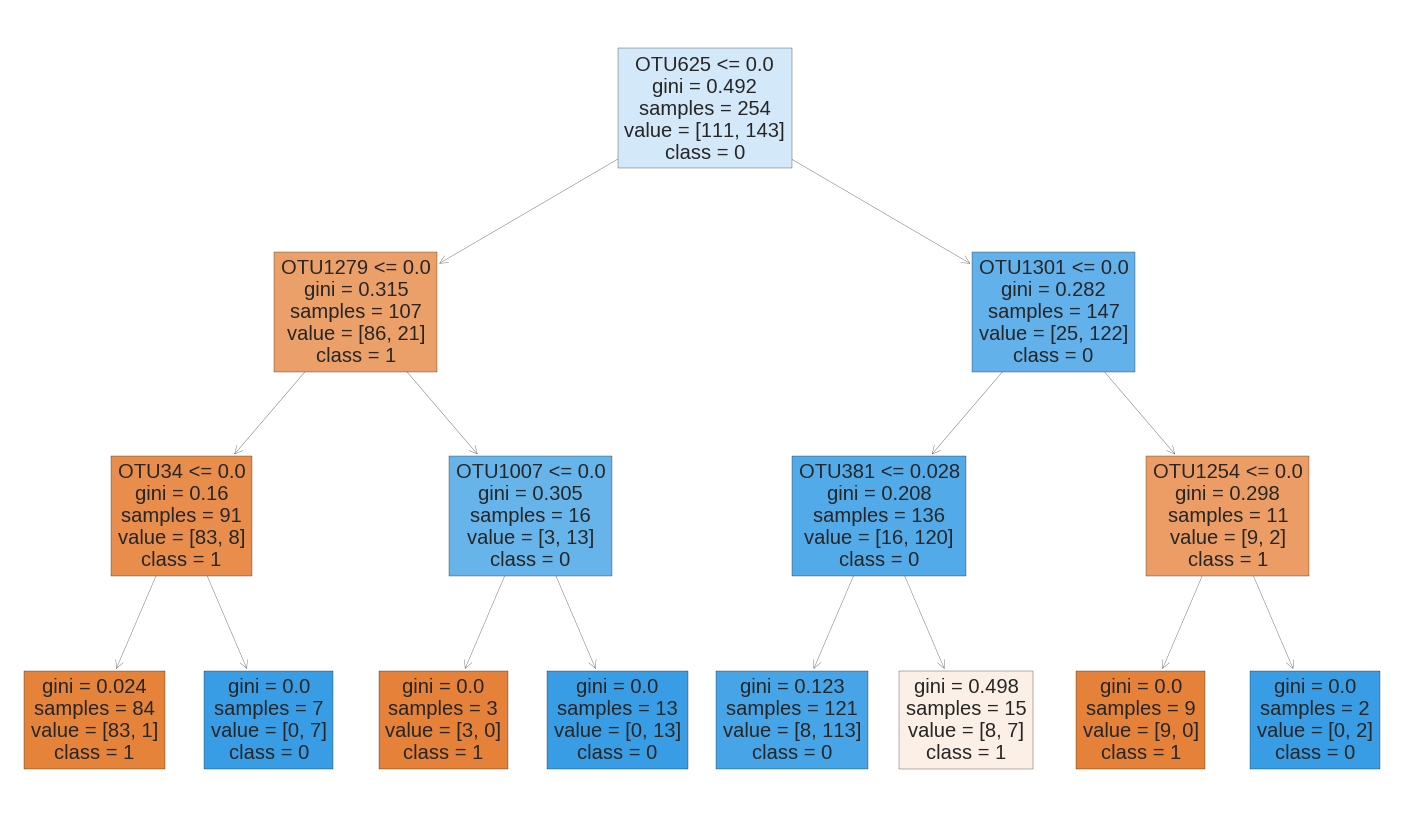

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3)
model = clf.fit(x, y)
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf, 
                   feature_names=x.columns,  
                   class_names='10',
                   filled=True)

**Create the Classification Models for evaluation**

In [ ]:
models=[]
models.append(('Decision Tree: ', DecisionTreeClassifier()))
models.append(('Random Forest: ', RandomForestClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))


**Create the Feature Selection Models**

In [ ]:
featureselection =[]
featureselection.append(('Original',x))
featureselection.append(('Elastic Net',x_elastic))
featureselection.append(('PCA',x_pca))
featureselection.append(('t-SNE',x_tsne))
featureselection.append(('Auto Encoders',x_ae))
featureselection.append(('Lasso',x_lasso))

## **Evaluate Models**

**Run the KFold cross validation**

In [ ]:
#Array to hold the accuracy results
results = []
trials = []
for fname, x_values in featureselection:
  kfold = KFold(n_splits=5, random_state=7,shuffle= True)
  for name, model in models:
    result = cross_val_score(model, x_values, y, cv=kfold, scoring='accuracy')
    f1score = cross_val_score(model, x_values, y, cv=kfold, scoring='f1_weighted')
    accuracy = cross_val_score(model, x_values, y, cv=kfold, scoring='accuracy')
    precision = cross_val_score(model, x_values, y, cv=kfold, scoring='precision')
    recall = cross_val_score(model, x_values, y, cv=kfold, scoring='recall')
    #results.append([fname,name,'F1-score',f1score.mean()*100, f1score.std()*100])
    results.append([fname,name,'accuracy',accuracy.mean()*100, accuracy.std()*100])
    #results.append([fname,name,'precision',precision.mean()*100, precision.std()*100])
    #results.append([fname,name,'recall',recall.mean()*100, recall.std()*100])
    count = 0
    for r in result:
      count+=1
      trials.append([fname,name,count,r])
    results.append([fname,name,result.mean()*100, result.std()*100])
 

**Export the results to a csv file**

In [ ]:
results_df = pd.DataFrame(trials, columns = ['Test Name','Name','Trial','Accuracy'])
results_df.to_csv('trials.csv')
results_df = pd.DataFrame(results, columns = ['Test Name','Name','Accuracy Metric','F1 Score Mean','F1 Score SD'])
results_df.to_csv('results_df.csv')

## **Finalize the model and Tune parameters**

**Perform hyperparameter tuning to tune the finalized model**






In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

**Print the confusion matrix of the finalized model**

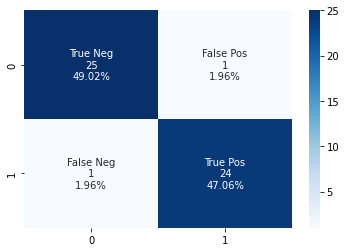

In [ ]:
#Random Forest tsne

X_train, X_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cf_matrix  = (confusion_matrix(y_test, y_pred))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## **Visualizations**

**Plot PCA points**

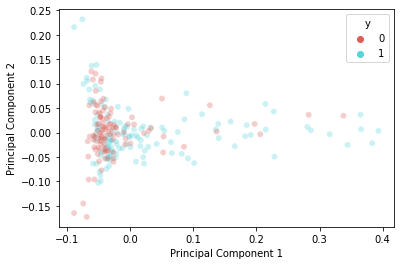

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = ['Principal Component 1','Principal Component 2'])
principalDf['y'] = y

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=principalDf,
    legend="full",
    alpha=0.3
)

**Plot t-SNE points**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarn

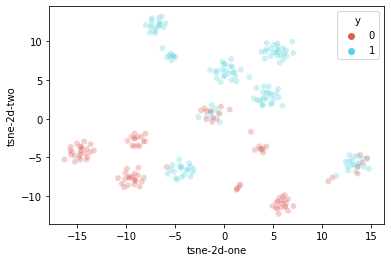

In [ ]:
tsne = TSNE(metric = 'jaccard', perplexity=30.0)
x_tsne = tsne.fit_transform(x,y)
principalDf = pd.DataFrame(data=x_tsne, columns = ['tsne-2d-one','tsne-2d-two'])
principalDf['y'] = y
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=principalDf,
    legend="full",
    alpha=0.3
)

**Validation curve of RF with Full features**

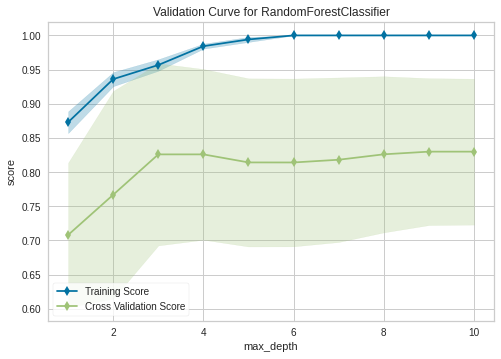

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4207de4c90>,
                cv=5,
                estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve 

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)
# Plot the validation curve
print(validation_curve(rf, x, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=5, scoring="accuracy"))

**Validation curve of RF with reduced features**

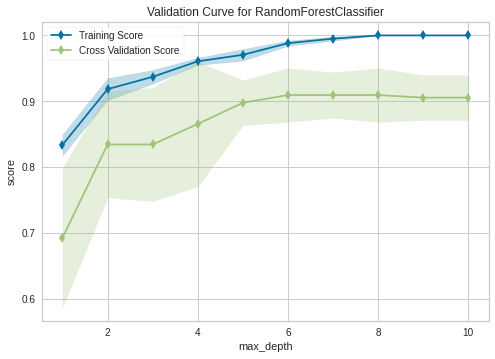

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4207d46a90>,
                cv=5,
                estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [ ]:
from yellowbrick.model_selection import validation_curve 

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)
# Plot the validation curve
print(validation_curve(rf, x_tsne, y, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=5, scoring="accuracy"))